## TASK 1 - Blob detection
Group Number: 4

### 1. Data import and preparation

Read an input image from your local directory as grayscale and normalize the values between 0 and 1.

In [1]:
%load_ext autoreload
%autoreload 1
%aimport filters, utils
from skimage.feature import peak_local_max
import matplotlib.pyplot as plt
import numpy as np
import filters
import utils
import cv2

# Adjust size of image plot here
plt.rcParams['figure.figsize'] = [8, 5]
plt.rcParams['figure.dpi'] = 150

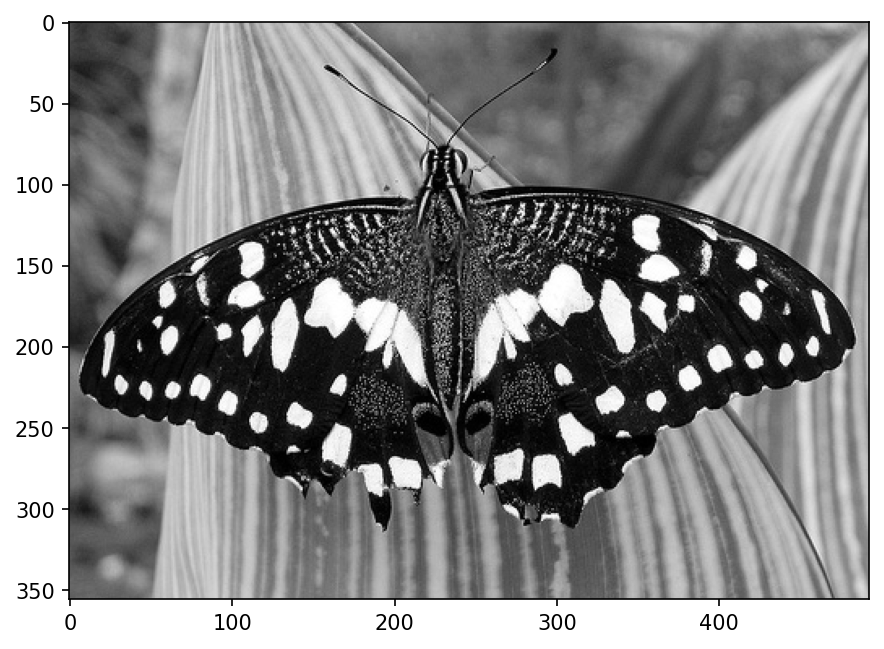

In [4]:
#student_code start

img = cv2.imread('data/butterfly.jpg', cv2.IMREAD_GRAYSCALE)
norm_img = img/255
plt.imshow(norm_img, cmap='gray')
plt.show()

#student_code end

### 2. Scale Space Creation

Generate the image pyramid using ***get_log_pyramid(..)*** in _filters.py_. Check your results with ***utils.show_plot(..)***

***Submission:*** Save the *third level* of the image scale space of the butterfly as **task1_filtered.png** using ***utils.show_plot(..)***.


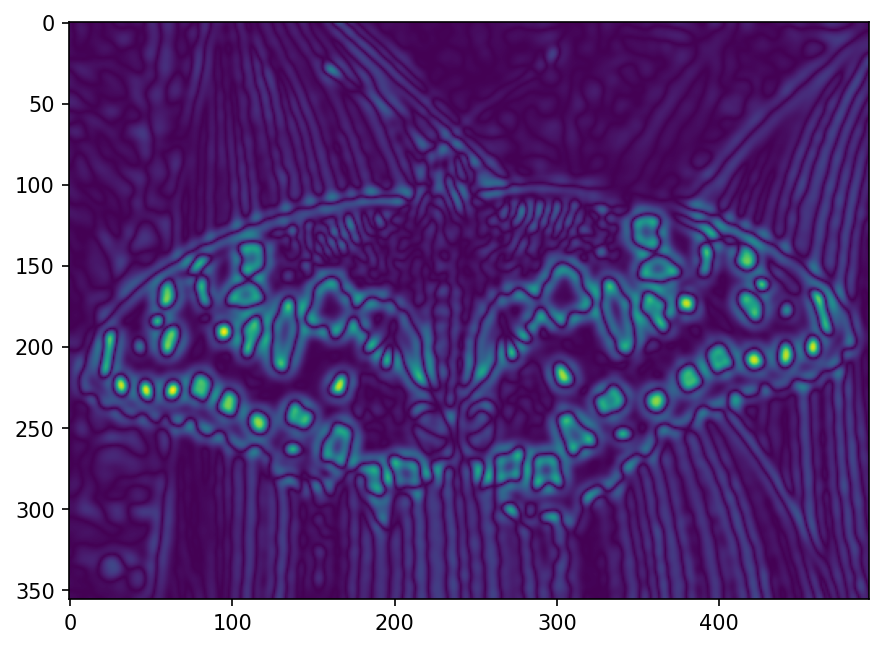

In [5]:
sigma = 2
k = 1.3
levels = 10

#student_code start

scale_space, all_sigmas = filters.get_log_pyramid(norm_img, sigma, k, levels)
utils.show_plot(scale_space[:,:,2])
# utils.show_plot(img=scale_space[:,:,2], group_no='Group_4', name= 'task1_filtered')

#student_code end

### 2. Blob detection

Perform the first step of the non-maximum suppression by setting the values in the scale space below a certain threshold to zero. Then, look for maxima in a defined local neighbourhood, in this case: the 26-connection. ***skimage.feature.peak_local_max(..)*** is useful to obtain local maxima. Complete method ***utils.show_blobs(..)*** and plot the blobs.


***Submission:*** Save the image including the blobs as **task1_blobs_full.png** (threshold around 0.3).

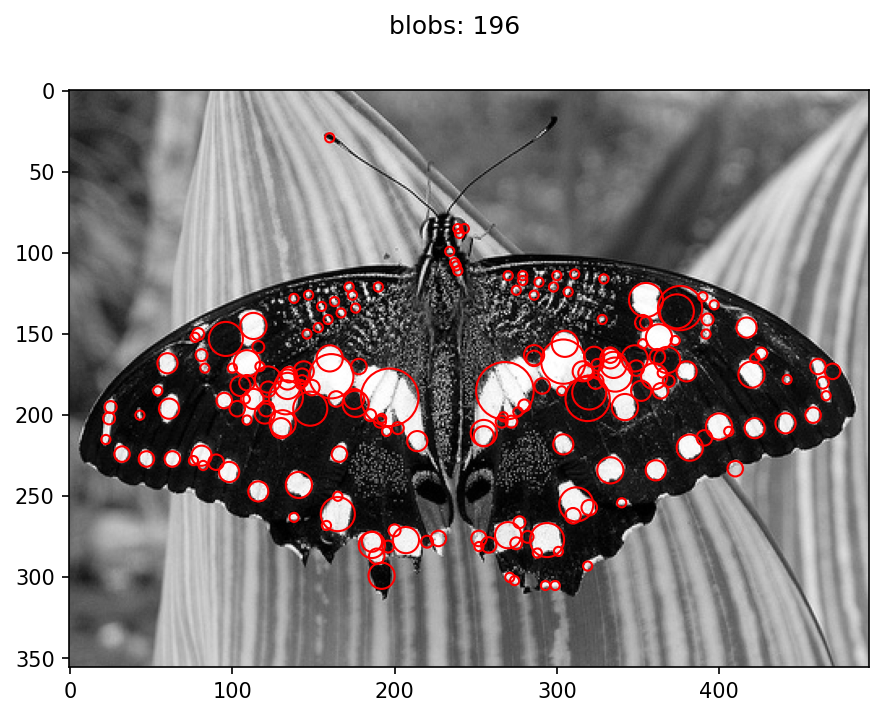

In [4]:
thres = 0.3

#student_code start

peaks = peak_local_max(image=scale_space, min_distance=1, threshold_abs=thres, exclude_border=0)
utils.show_blobs(img, peaks, all_sigmas)
# utils.show_blobs(img, peaks, all_sigmas, group_no='Group_4', name='task1_blobs_full')

#student_code end


### 3. Evaluation 

Apply the process to a half-sized version of the input image. Plot your results as well with ***utils.show_blobs(..)***.

_***HINT:***_
_cv2.resize(..)_


***Submission:*** Save the result as **task1_blobs_half.png**.

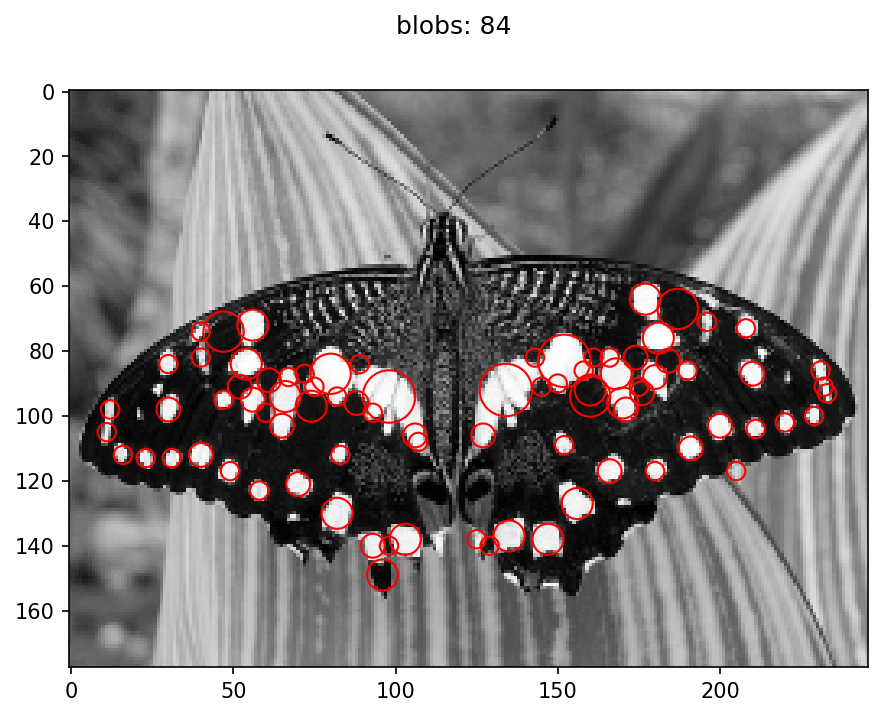

In [5]:
#student_code start

resized_img = cv2.resize(img, (0,0), fx=0.5, fy=0.5)
res_norm_img = resized_img/255

res_scale_space, all_sigmas = filters.get_log_pyramid(res_norm_img, sigma, k, levels)
res_peaks = peak_local_max(image=res_scale_space, min_distance=1, threshold_abs=thres, exclude_border=0)
utils.show_blobs(resized_img, res_peaks, all_sigmas)
# utils.show_blobs(resized_img, res_peaks, all_sigmas, group_no='Group_4', name='task1_blobs_half')

#student_code end

*** 
#### Taking a close look at the detected blobs on different image scales, is the method able to find blobs in a scale-invariant way? What could be reasons for observed errors or inaccurately detected blobs? 

Yes, the method is able to detect blobs on different image scale and the example confirms this fact.
The LoG operator works at different levels corresponding to different receptive fields in the image, therefore interesting points are detected in both the full and the resized image at different levels.\
Smallest blobs in the full image don't appear any more in the resized image. Probably these blobs are detected in an high level in the full image, which means that rely on a small receptive field. The resize heavely modifies these areas and therefore there are no peaks in the resized image, meaning that no blobs are detected for these locations.

#### 3.1 LoG Response

Pick a detected keypoint and plot the response of the LoG for all scales in both image versions. The outcome should be a 2D plot where the x-axis represents the scale of the filter and the y-axis the filter response at the selected keypoint position. 

_***HINT:***_
_plt.plot(..)_

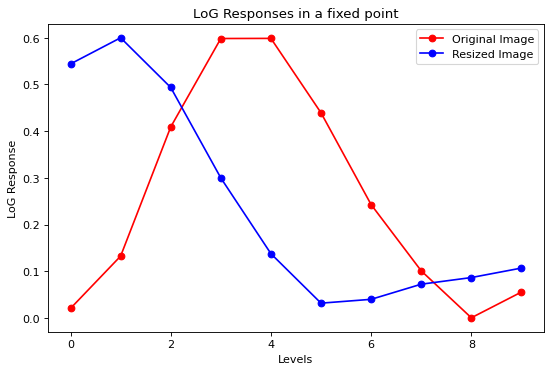

In [6]:
#student_code start

x,y,z = res_peaks[0]
ax_x = range(levels)
LoG_response = scale_space[x*2,y*2,:]
res_LoG_response = res_scale_space[x,y,:]

plt.figure(figsize=(8, 5), dpi=80)
plt.title('LoG Responses in a fixed point')
plt.plot(ax_x, LoG_response, '-ro', ax_x, res_LoG_response, '-bo')
plt.xlabel('Levels')
plt.ylabel('LoG Response')
plt.legend(['Original Image', 'Resized Image'])
plt.show()

#student_code end

*** 
#### Describe and explain the difference between the two LoG response curves.

Here we are considering an interesting point and indeed we can see a peak in the LoG response both in the full and in the resized image. However the peaks occur at different levels and in particular the peak of in the resized image is left-shifted respect to the other one.\
This is due to the fact that both peaks rely on the same receptive field, but this corresponds to different levels in the two images. In the resized image the peak is detecetd in the second level, but to achieve the same receptive field in the full image we have to go deeper untill the fourth level.

#### 3.2 Own Image

Import an image of your choice and apply the process once again. 


***Submission:*** Save the image including blobs with ***utils.show_blobs(..)*** as: **task1_blobs_own.png**

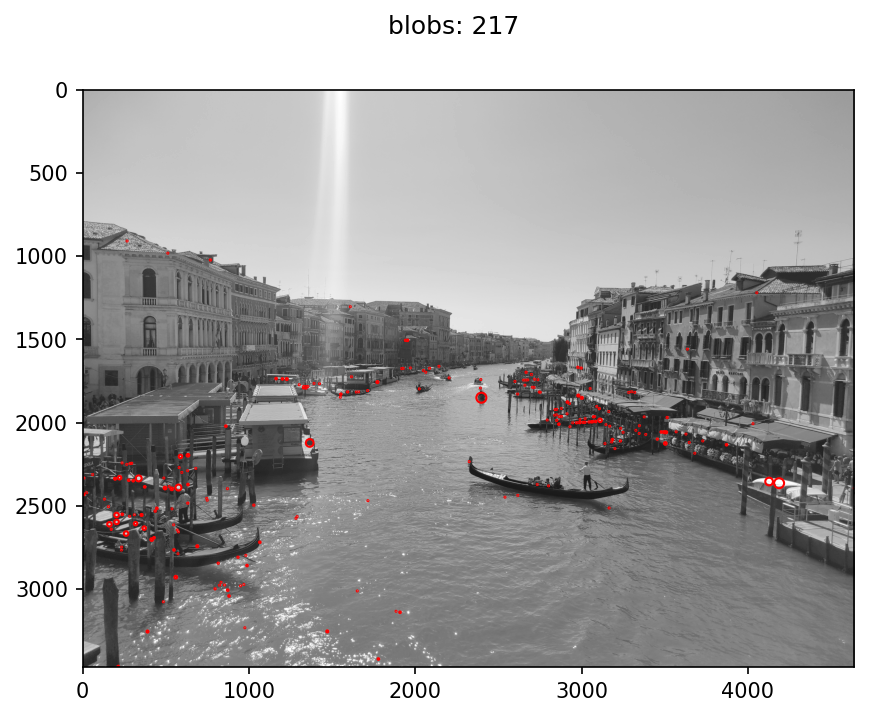

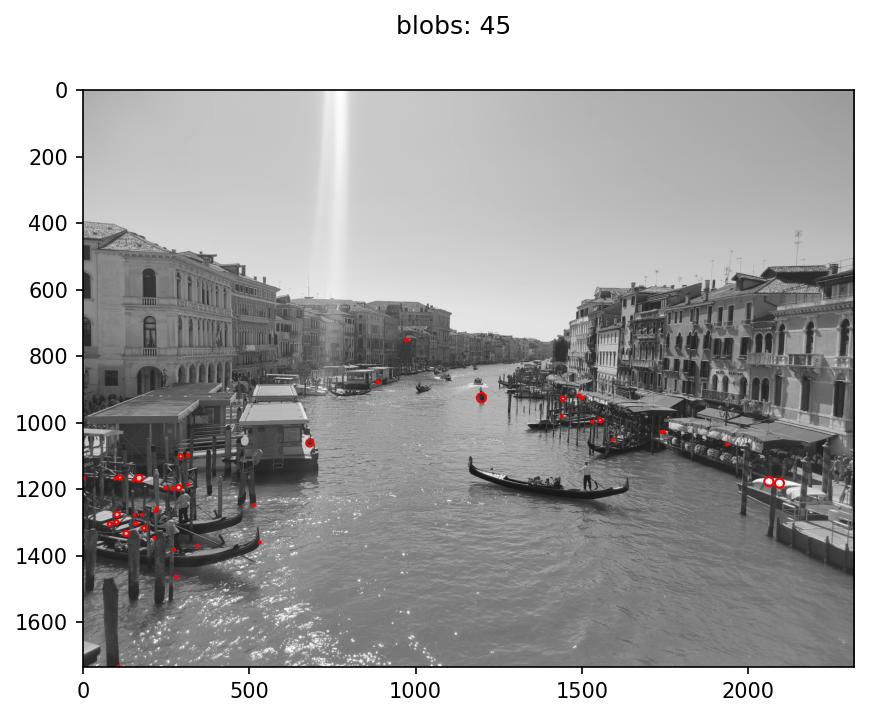

In [7]:
#student_code start

img = cv2.imread('data/venice.jpg', cv2.IMREAD_GRAYSCALE)
norm_img = img/255

scale_space, all_sigmas = filters.get_log_pyramid(norm_img, sigma, k, levels)
peaks = peak_local_max(image=scale_space, min_distance=1, threshold_abs=thres, exclude_border=0)
utils.show_blobs(img, peaks, all_sigmas)
# utils.show_blobs(img, peaks, all_sigmas, group_no='Group_4', name='task1_blobs_own')

resized_img = cv2.resize(img, (0,0), fx=0.5, fy=0.5)
res_norm_img = resized_img/255

res_scale_space, all_sigmas = filters.get_log_pyramid(res_norm_img, sigma, k, levels)
res_peaks = peak_local_max(image=res_scale_space, min_distance=1, threshold_abs=thres, exclude_border=0)
utils.show_blobs(resized_img, res_peaks, all_sigmas)

#student_code end

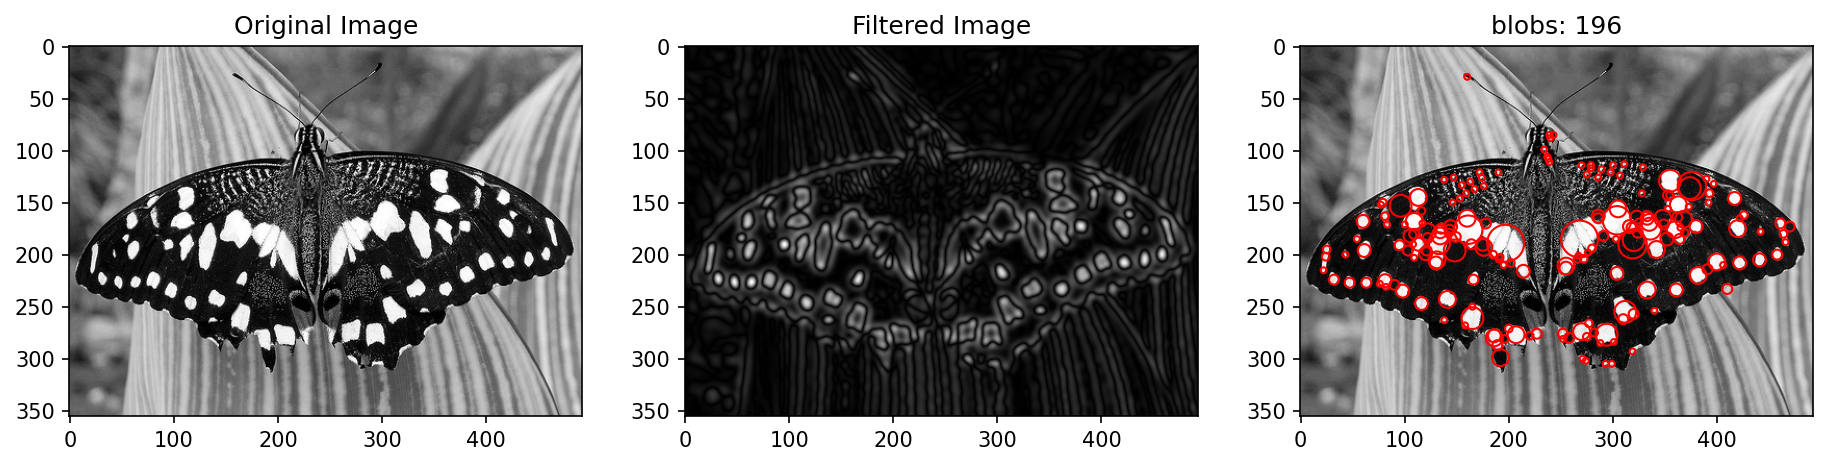

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import peak_local_max
import filters

# Load the image
img = cv2.imread('data/butterfly.jpg', cv2.IMREAD_GRAYSCALE)
norm_img = img / 255

# Plot the original image
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

# Apply LoG filter
sigma = 2
k = 1.3
levels = 10
scale_space, all_sigmas = filters.get_log_pyramid(norm_img, sigma, k, levels)
img_filtered = scale_space[:, :, 2]

# Plot the filtered image
plt.subplot(1, 3, 2)
plt.imshow(img_filtered, cmap='gray')
plt.title('Filtered Image')

# Find peaks
thres = 0.3
peaks = peak_local_max(image=scale_space, min_distance=1, threshold_abs=thres, exclude_border=0)

# Plot the peaks on the original image
plt.subplot(1, 3, 3)
radi = np.take(all_sigmas, peaks[:, 2]) * np.sqrt(2)
plt.imshow(img, cmap="gray")
for i in range(len(peaks)):
    circ = plt.Circle((peaks[i, 1], peaks[i, 0]), radi[i], color='r', fill=False)
    plt.gca().add_patch(circ)

plt.title("blobs: " + str(len(peaks)))
plt.show()
